1. importing libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

2. Data loading and understanding

In [172]:
#load data into pandas data frame
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [173]:
df.shape

(7043, 21)

In [174]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [175]:
pd.set_option('display.max_columns', None)

In [176]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [178]:
#droping customer_id as this is not required for modeling
df= df.drop(columns = ['customerID'])

In [179]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [180]:
print(df["gender"].unique())

['Female' 'Male']


In [181]:
print(df["SeniorCitizen"].unique())

[0 1]


In [182]:
#printing the unique vlues in all the columns
for col in df.columns:
  print(col, df[col].unique())
  print("_"*50)

gender ['Female' 'Male']
__________________________________________________
SeniorCitizen [0 1]
__________________________________________________
Partner ['Yes' 'No']
__________________________________________________
Dependents ['No' 'Yes']
__________________________________________________
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
__________________________________________________
PhoneService ['No' 'Yes']
__________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
_______

In [183]:
numerical_features_list = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
      print(col, df[col].unique())
      print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [184]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [185]:
#totalcharges must be numeric
# df['TotalCharges'] = df["TotalCharges"].astype(float)
#space represented as missing values


In [186]:
#filtering dataframe for totalcharges
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [187]:
#replace empty string with 0.0
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"})

In [188]:
#now we can convert totalcharges into numeric(float)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [190]:
#checking the class distribution of target column
print(df["Churn"].value_counts())

#clear inbalance in these values , yes 5184 and no 1859


Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights**
1. customers_id removed as it is not required in modeling
2. no missing values in dataset
3. Missing values in the TotalCharges column were replaced with 0
4. class inbalance identified in the target


3. Eploratory Data Analysis

In [191]:
df.shape

(7043, 20)

In [192]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [193]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [194]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features Analysis -

  understand the distribution of numerical features

In [195]:
from matplotlib.lines import lineStyles
def plot_histogram(df, column_name):
  plt.figure(figsize=(8,5)
  )
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  #calculate the mean and median value of column
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical line for mean and median
  plt.axvline(col_mean, color='red', ls="--", label="mean")
  plt.axvline(col_median, color='green', ls="-", label="median")

  plt.legend()
  plt.show()


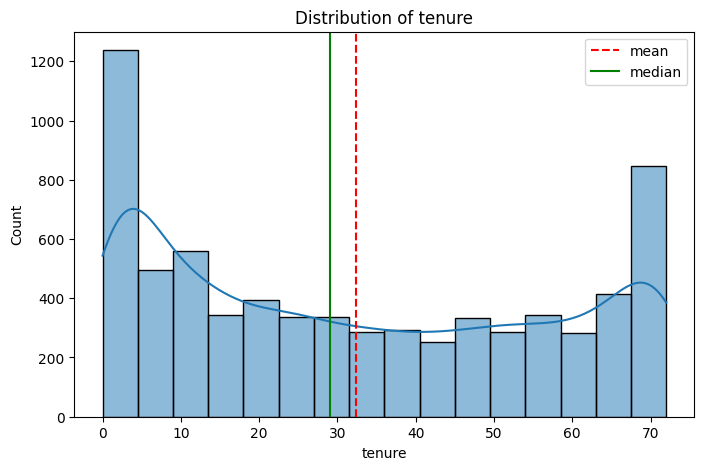

In [196]:
plot_histogram(df, "tenure")

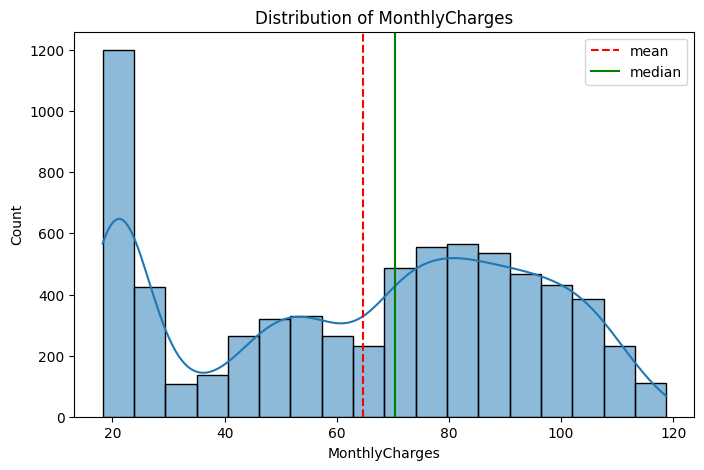

In [197]:
plot_histogram(df, "MonthlyCharges")

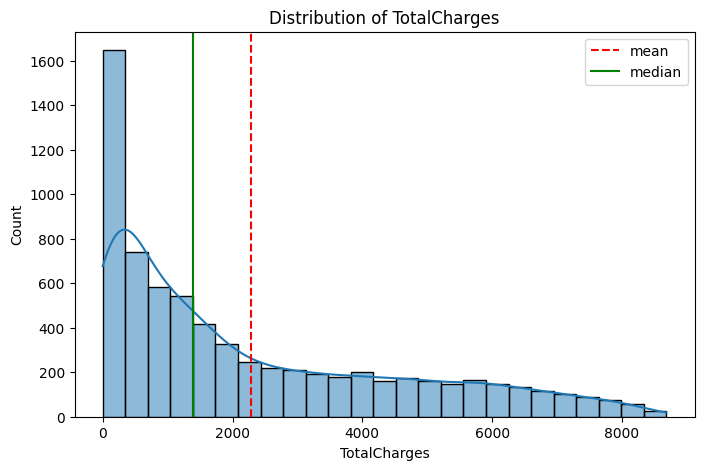

In [198]:
plot_histogram(df, "TotalCharges")

BOX PLOT FOR NUMERICAL FEATURES

In [199]:
def box_plot(df, column_name):
  sns.boxplot(y=df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.ylabel(column_name)
  plt.show()

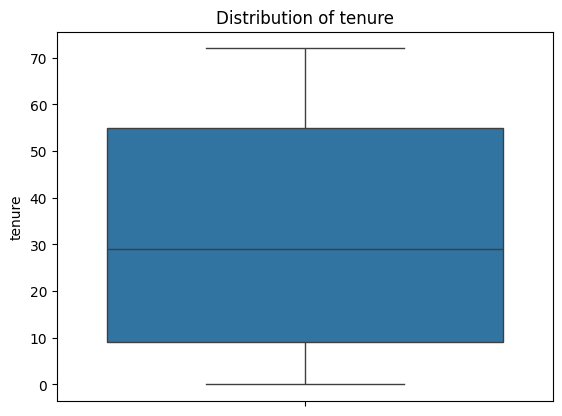

In [200]:
box_plot(df, "tenure")

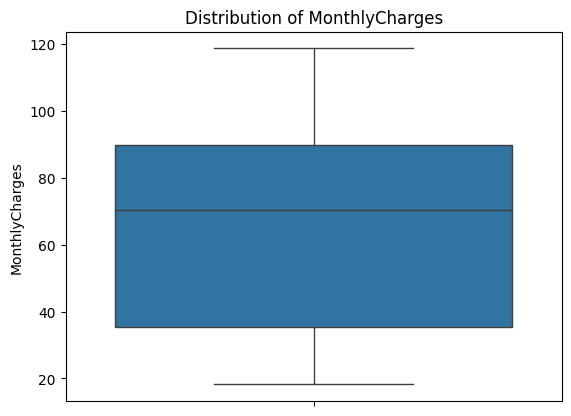

In [201]:
box_plot(df, "MonthlyCharges")

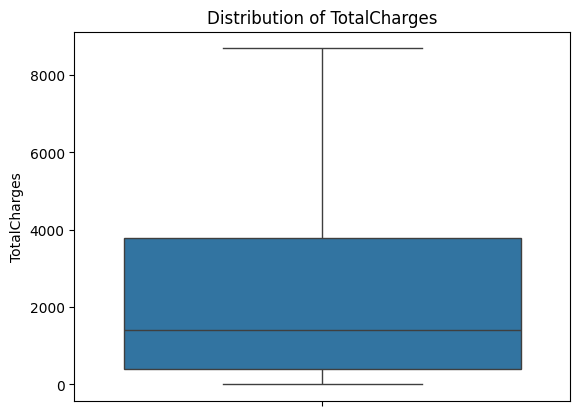

In [202]:
box_plot(df, "TotalCharges")

correlation Heatmap for numerical features

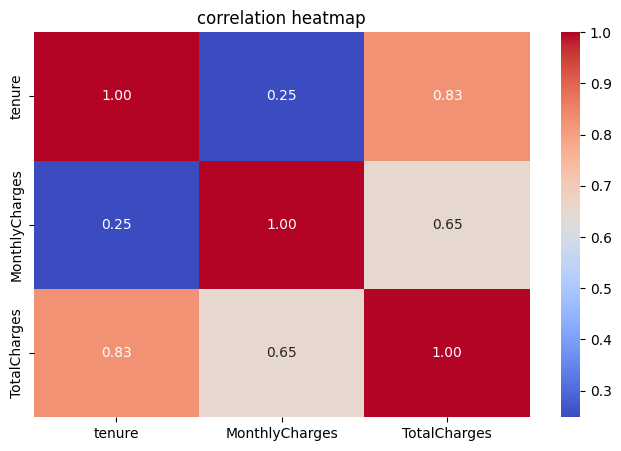

In [203]:
#correlation matrix - Heatmap
plt.figure(figsize= (8,5))
sns.heatmap(df[["tenure", "MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

categorical features analysis

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


COUNT PLOT FOR CATEGORICAL COLUMNS

In [205]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [206]:
object_cols = ["SeniorCitizen"] + object_cols

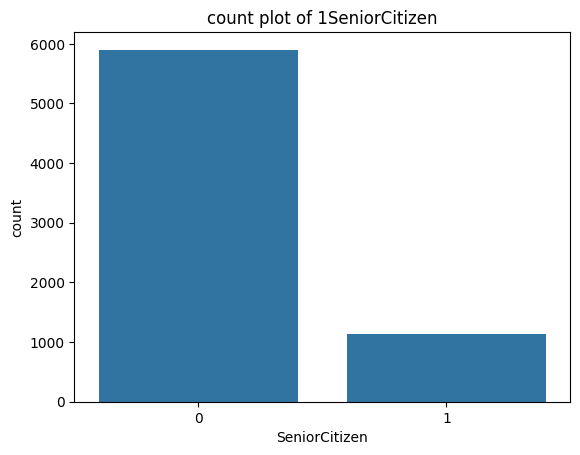

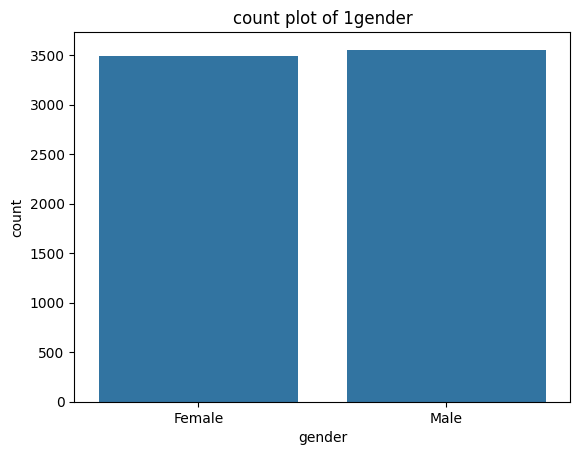

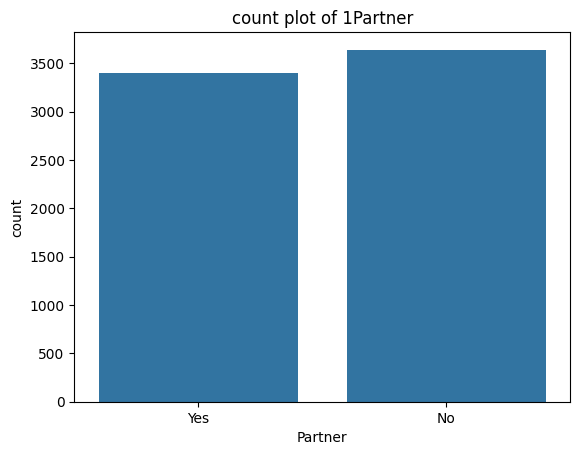

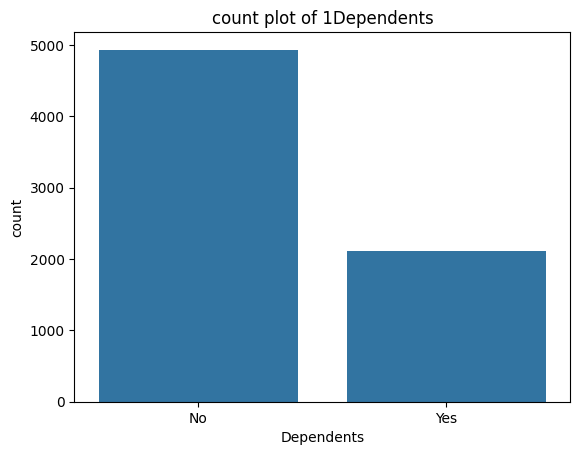

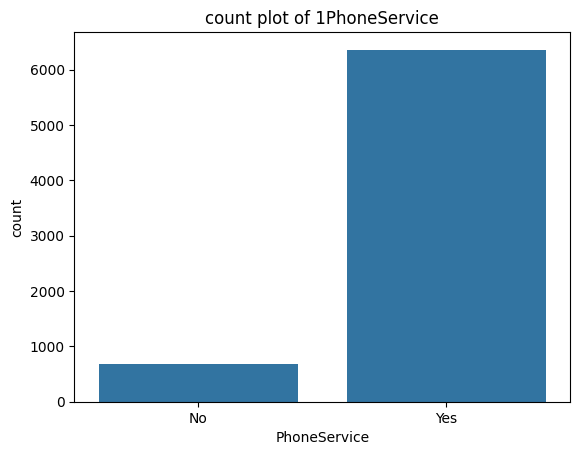

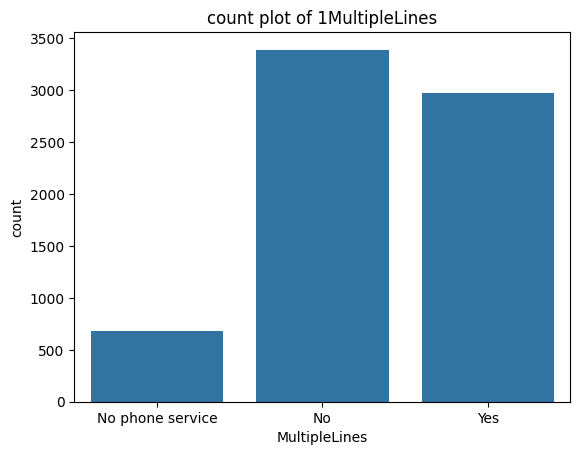

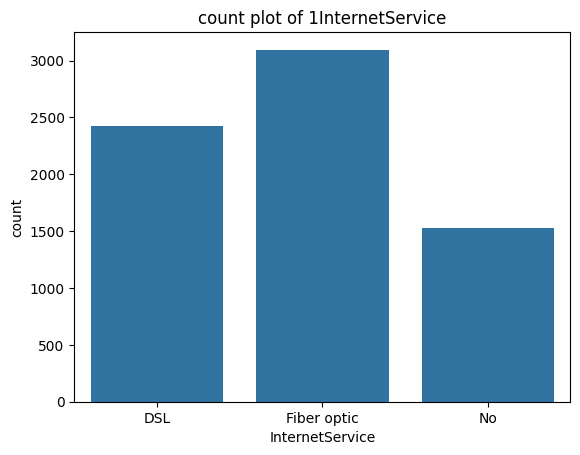

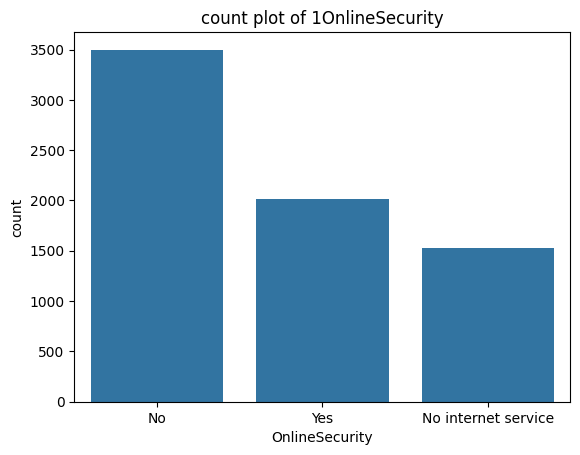

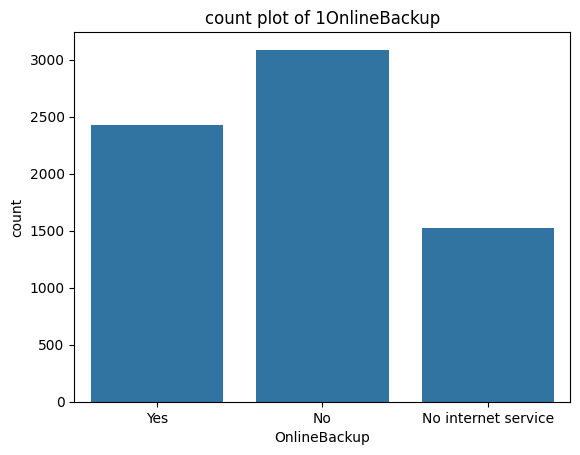

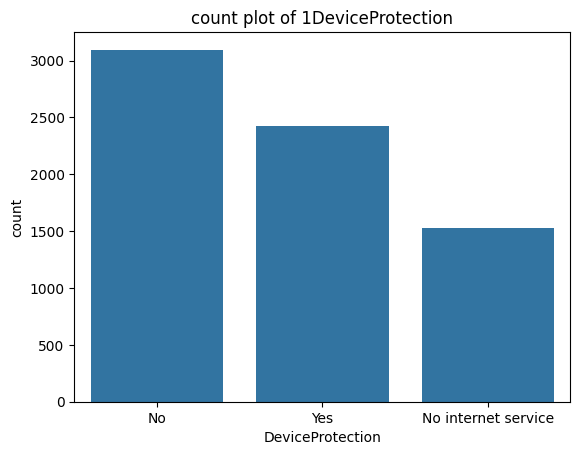

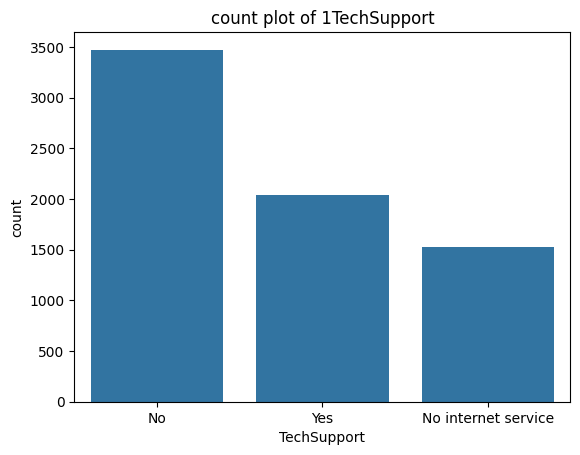

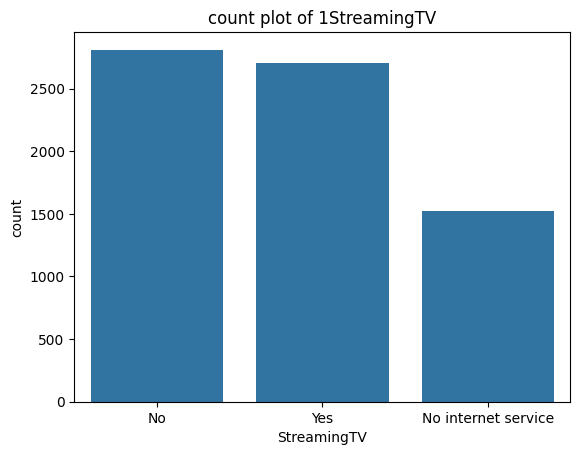

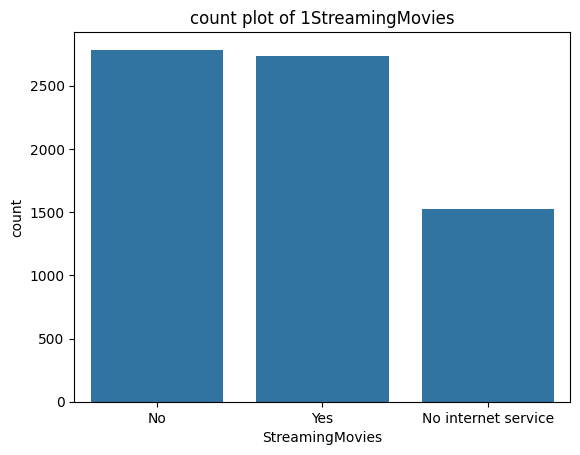

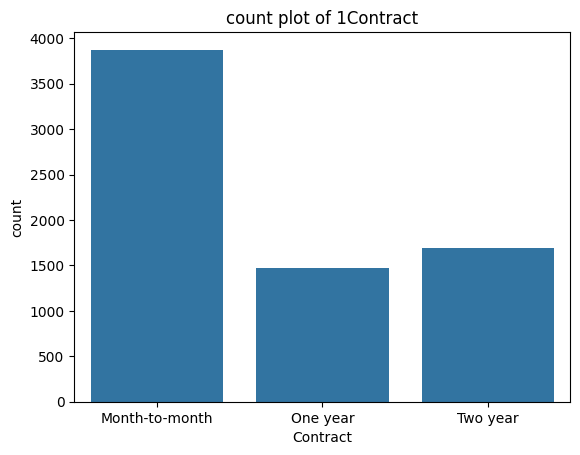

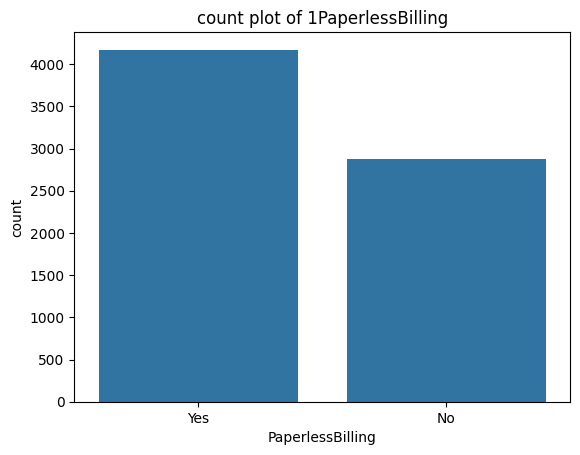

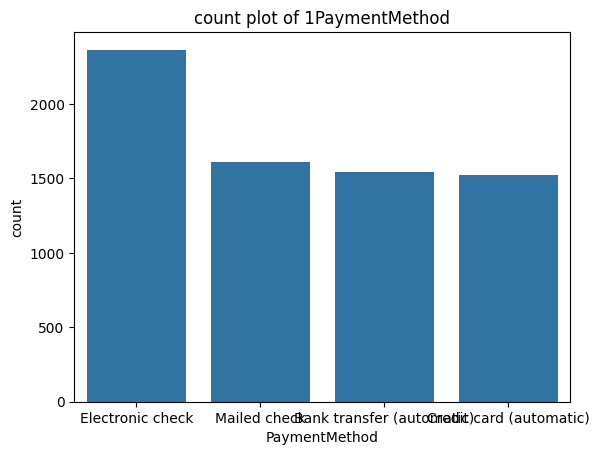

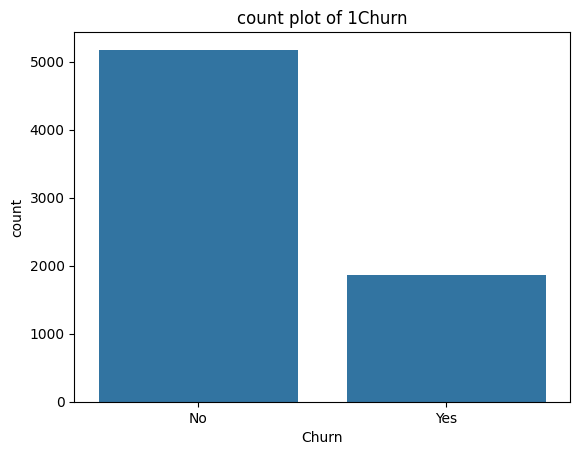

In [207]:
for col in object_cols:
  sns.countplot(x=df[col])
  plt.title(f"count plot of 1{col}")
  plt.show()

Data preprocessing

In [208]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [209]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


/tmp/ipython-input-940221908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [210]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [211]:
import pandas as pd
import numpy as np
import shap
import joblib  # For saving the model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [212]:
# Set pandas to show all columns
pd.set_option('display.max_columns', None)

# --- 2. DATA LOADING & INITIAL CLEANING ---
# Load the dataset (Make sure the path matches your upload)
# df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop customerID as it has no predictive power
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

In [213]:
# Fix 'TotalCharges': It comes as string ' ' for new customers, force to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill the created NaNs (new customers have 0 total charge)
df['TotalCharges'].fillna(0, inplace=True)


/tmp/ipython-input-3308132935.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [214]:
# --- 3. DEFINE FEATURES ---
X = df.drop('Churn', axis=1)
y = df['Churn']

# Automatically select column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Features Identified: {len(categorical_cols)} Categorical, {len(numerical_cols)} Numerical")


Features Identified: 15 Categorical, 4 Numerical


In [215]:
# --- 4. BUILD THE INDUSTRY PIPELINE ---
# Step A: Preprocessing for Numerical Data (Impute missing -> Scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [216]:
# Step B: Preprocessing for Categorical Data (Impute missing -> OneHotEncode)
# handle_unknown='ignore' ensures the model doesn't crash on new, unseen categories in production
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [217]:
#  Step C: Bundle Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [218]:

# Step D: The Full Pipeline (Preprocessor -> SMOTE -> Classifier)
# NOTE: SMOTE is inside the pipeline so it ONLY runs on the Training fold during Cross-Validation
churn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Fixes class imbalance
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10))
])


In [219]:

# --- 5. TRAIN & EVALUATE ---
# Split Data (Stratify ensures we have the same % of churners in train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training the pipeline...")
churn_pipeline.fit(X_train, y_train)

# Predict
y_pred = churn_pipeline.predict(X_test)

# Report
print("\n--- MODEL PERFORMANCE ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training the pipeline...

--- MODEL PERFORMANCE ---
Accuracy: 0.7672107877927609

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83      1035
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409




Calculating SHAP Values (Explainability)...
Shape of X_test_processed: (1409, 45)
Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (1409, 45, 2)
SHAP values detected as 3D numpy array with shape: (1409, 45, 2)
Length of all_feature_names: 45


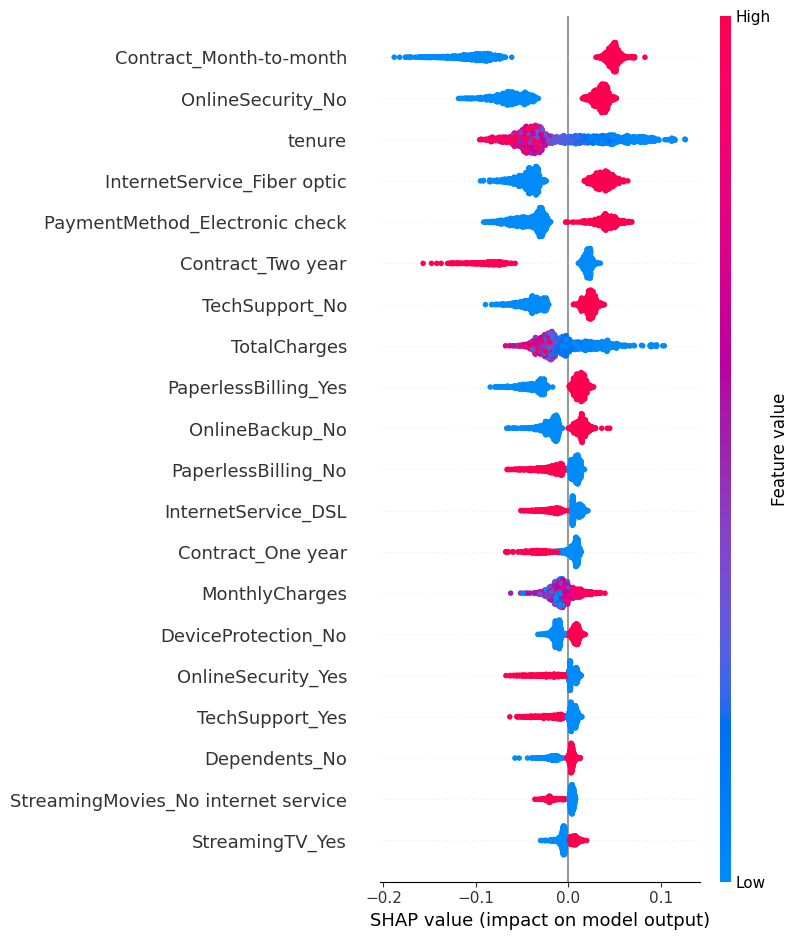

In [222]:
import numpy as np

# --- 6. MODEL EXPLAINABILITY (SHAP) ---
# Industry Requirement: Explain WHY customers are leaving
print("\nCalculating SHAP Values (Explainability)...")

# We need to access the steps inside the pipeline to use SHAP
model = churn_pipeline.named_steps['classifier']
preprocessor_obj = churn_pipeline.named_steps['preprocessor']

# Transform the test set using the preprocessor so SHAP can understand it
X_test_processed = preprocessor_obj.transform(X_test)

# Ensure X_test_processed is a dense array for SHAP (if it's sparse)
# ColumnTransformer with OneHotEncoder can output sparse matrices
if hasattr(X_test_processed, 'toarray'):
    X_test_processed = X_test_processed.toarray()

# Get feature names back from OneHotEncoder for the plot
ohe_feature_names = preprocessor_obj.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(ohe_feature_names)

# Create Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_processed)

# Debugging prints to identify the shape mismatch
print(f"Shape of X_test_processed: {X_test_processed.shape}")
print(f"Type of shap_values: {type(shap_values)}")
if isinstance(shap_values, np.ndarray):
    print(f"Shape of shap_values: {shap_values.shape}")


shap_values_to_plot = None
if isinstance(shap_values, list) and len(shap_values) > 1:
    print(f"SHAP values detected as list of {len(shap_values)} arrays.")
    print(f"Shape of shap_values[0] (Class 0): {shap_values[0].shape}")
    print(f"Shape of shap_values[1] (Class 1): {shap_values[1].shape}")
    shap_values_to_plot = shap_values[1] # For the positive class (Churn)
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 2:
    print(f"SHAP values detected as 2D numpy array with shape: {shap_values.shape}")
    shap_values_to_plot = shap_values
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    print(f"SHAP values detected as 3D numpy array with shape: {shap_values.shape}")
    # Assuming the last dimension is for classes, and we want the positive class (index 1)
    shap_values_to_plot = shap_values[:, :, 1]
else:
    print("Unexpected shap_values format.")

print(f"Length of all_feature_names: {len(all_feature_names)}")

# Assertions for clarity (will raise error if mismatch, guiding the user)
if shap_values_to_plot is not None:
    assert shap_values_to_plot.shape[1] == X_test_processed.shape[1], \
        f"Feature count mismatch: SHAP values have {shap_values_to_plot.shape[1]} features, " \
        f"but X_test_processed has {X_test_processed.shape[1]} features."
    assert X_test_processed.shape[1] == len(all_feature_names), \
        f"Feature name count mismatch: X_test_processed has {X_test_processed.shape[1]} features, " \
        f"but all_feature_names has {len(all_feature_names)} names."

    # Plot the Summary (This will show up in your notebook)
    shap.summary_plot(shap_values_to_plot, X_test_processed, feature_names=all_feature_names)
else:
    print("Cannot plot SHAP summary due to unexpected shap_values format.")


In [221]:

# --- 7. SAVE FOR PRODUCTION ---
# Save the ENTIRE pipeline. In production, you just load this and feed it raw data.
joblib.dump(churn_pipeline, 'production_churn_model.pkl')
print("\nPipeline saved as 'production_churn_model.pkl'. Ready for deployment.")


Pipeline saved as 'production_churn_model.pkl'. Ready for deployment.


In [223]:
# --- 8. TEST WITH A NEW CUSTOMER (The "Simple Output") ---

# Let's create a fake new customer to see if the model works
new_customer_data = pd.DataFrame({
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['No'],
    'Dependents': ['No'],
    'tenure': [2],                # New customer (High Risk)
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'], # High Risk service
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],   # High Risk contract
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [70.0],
    'TotalCharges': [140.0]
})

# 1. Get the Prediction (0 or 1)
prediction = churn_pipeline.predict(new_customer_data)[0]

# 2. Get the Probability (% chance)
probability = churn_pipeline.predict_proba(new_customer_data)[0][1]

# 3. Print the Result Clearly
print("\n--- NEW CUSTOMER PREDICTION ---")
if prediction == 1:
    print(f"🚨 PREDICTION: CHURN (Risk: {probability:.1%})")
    print("Action: Send retention offer immediately!")
else:
    print(f"✅ PREDICTION: STAY (Risk: {probability:.1%})")
    print("Action: No immediate action needed.")


--- NEW CUSTOMER PREDICTION ---
🚨 PREDICTION: CHURN (Risk: 86.8%)
Action: Send retention offer immediately!


In [225]:
# Create a dataframe with the Test Data
results_df = X_test.copy()
results_df['Actual_Churn'] = y_test
results_df['Predicted_Churn'] = y_pred
results_df['Churn_Probability'] = churn_pipeline.predict_proba(X_test)[:,1]

# Export to CSV for Power BI
results_df.to_csv('churn_predictions_for_powerbi.csv', index=False)
